In [28]:
# Análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler, QuantileTransformer, LabelEncoder

# Modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Evaluación y validación de modelos
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_auc_score, 
                           make_scorer, precision_score)

# Manejo de datos desbalanceados
from imblearn.over_sampling import SMOTE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

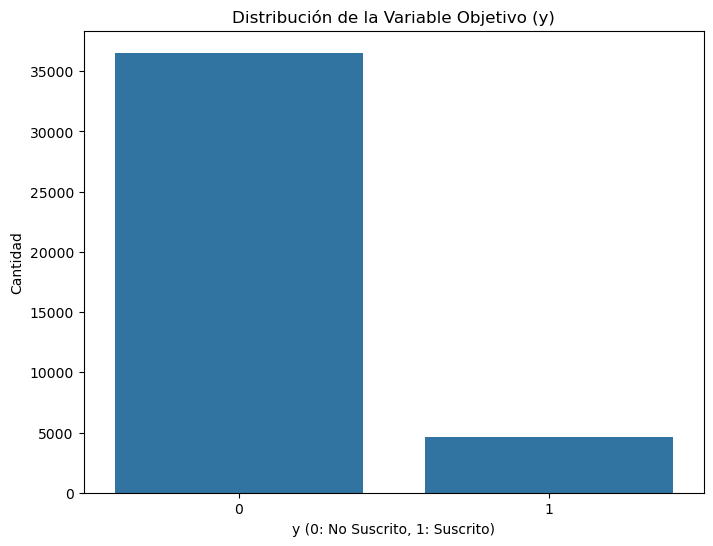

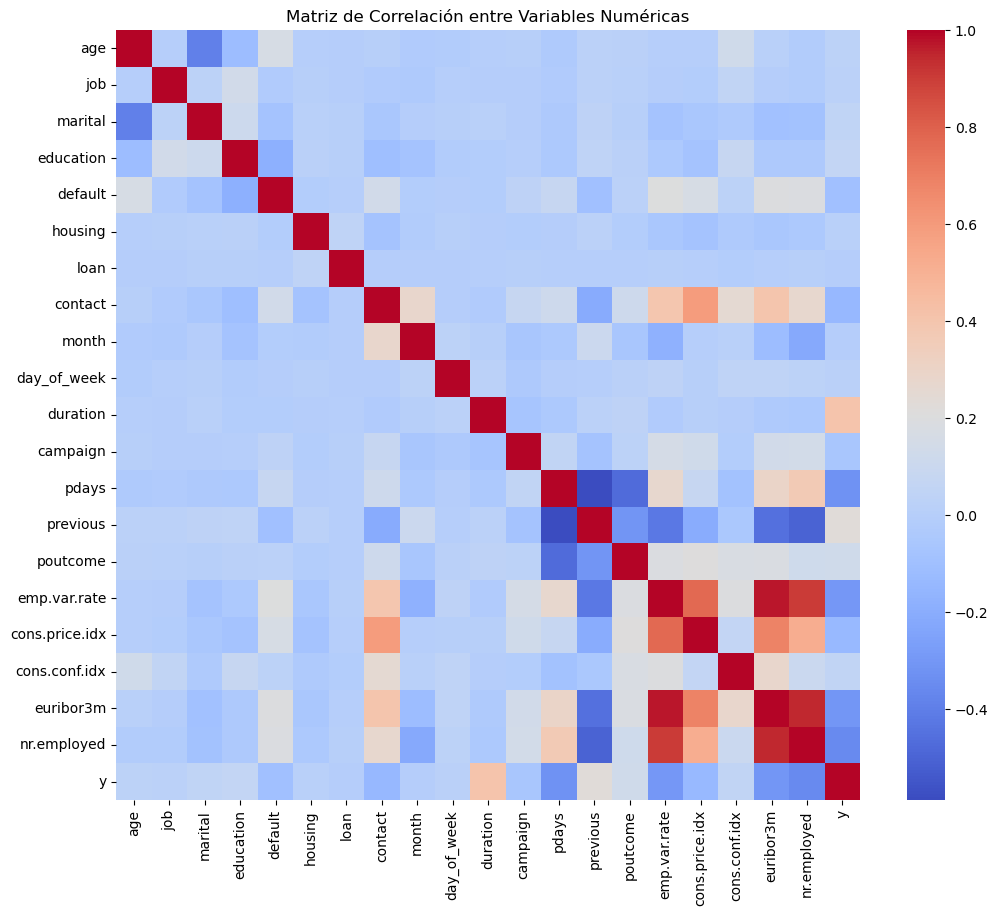

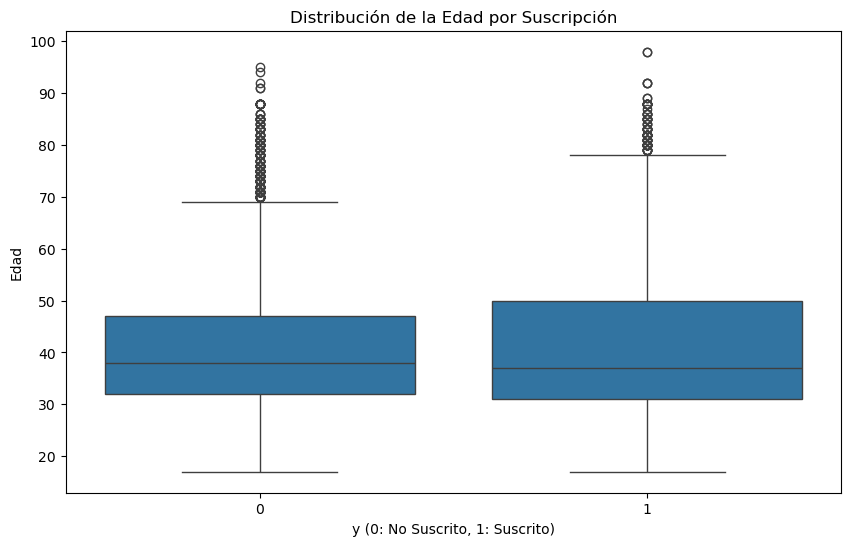

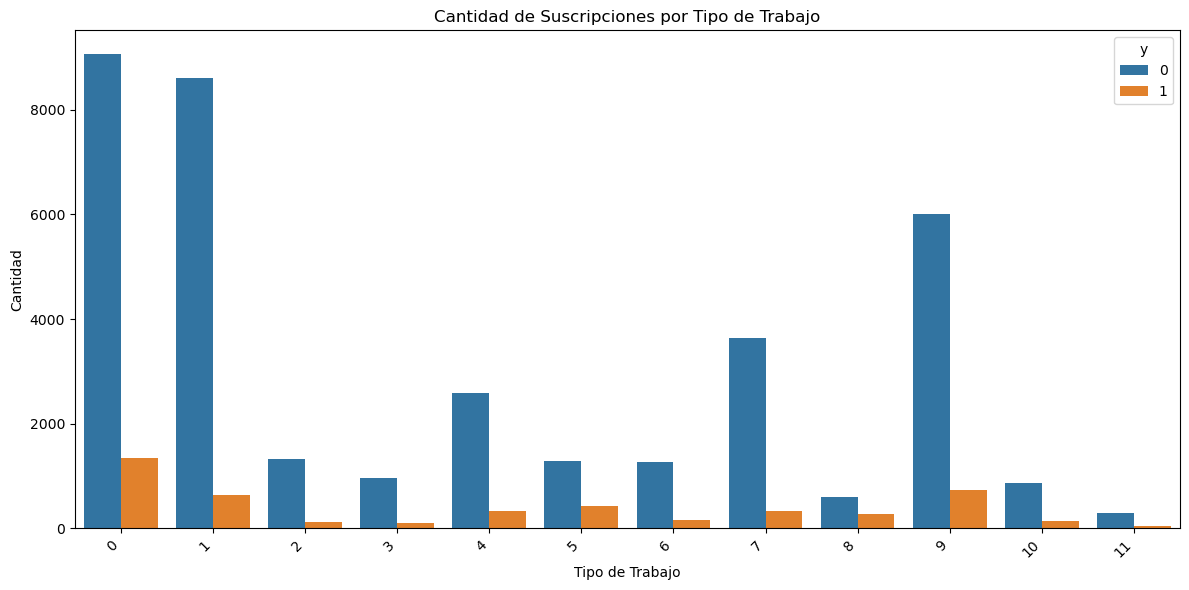

In [29]:
# # Librerías necesarias
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler, QuantileTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer, precision_score
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB

# Cargar el dataset
# Carga el dataset desde el archivo CSV.
df = pd.read_csv('bank_cleaned.csv')

# Imprimir información del dataset (tipos de datos, no nulos, memoria)
df.info()

# Imprimir conteo de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con valores nulos
# Elimina todas las filas que contengan al menos un valor nulo.
df = df.dropna()

# Convertir 'age' a tipo entero
# Asegura que la columna 'age' contiene números enteros.
df['age'] = df['age'].astype(int)

# Convertir variables categóricas a numéricas usando Label Encoding
# Primero, identifica las columnas que son de tipo 'object' (string). Son nuestras categóricas.
categorical_cols = df.select_dtypes(include=['object']).columns

# Inicializa el LabelEncoder
le = LabelEncoder()

# Aplica Label Encoding a cada columna categórica
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])  # Transforma los strings a valores numéricos.

# Imprimir los tipos de datos después de la conversión para verificar
print("\nTipos de datos después de la conversión:")
print(df.dtypes)

# **INICIO: Visualizaciones para el Análisis Exploratorio de Datos (EDA)**

# Gráfico de barras de la distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Distribución de la Variable Objetivo (y)')
plt.xlabel('y (0: No Suscrito, 1: Suscrito)')
plt.ylabel('Cantidad')
plt.show()

# Heatmap de correlación entre las variables numéricas
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Distribución de la edad en función de la variable objetivo
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Distribución de la Edad por Suscripción')
plt.xlabel('y (0: No Suscrito, 1: Suscrito)')
plt.ylabel('Edad')
plt.show()

# Cantidad de suscripciones por trabajo
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Cantidad de Suscripciones por Tipo de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **FIN: Visualizaciones para el Análisis Exploratorio de Datos (EDA)**

# Preparar los datos para el modelo
# 'y' es la variable objetivo que queremos predecir. Las otras son las características.
X = df.drop(columns=['y'])  # Features (variables independientes)
y = df['y']  # Target (variable dependiente)

# Dividir los datos en conjuntos de entrenamiento y prueba
# Esto nos permite evaluar el modelo en datos que no ha visto antes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
pip install --upgrade scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

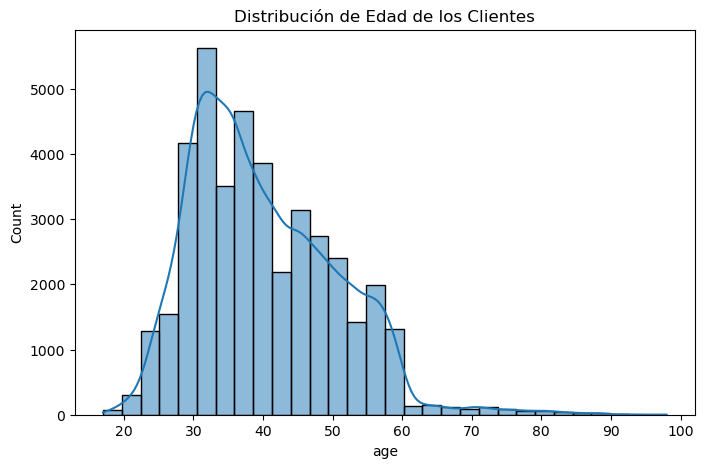

In [31]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el dataset limpio
df = pd.read_csv('bank_cleaned.csv')

# Análisis exploratorio
df.info()
print(df.describe())

# Visualización de la distribución de la edad
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.show()





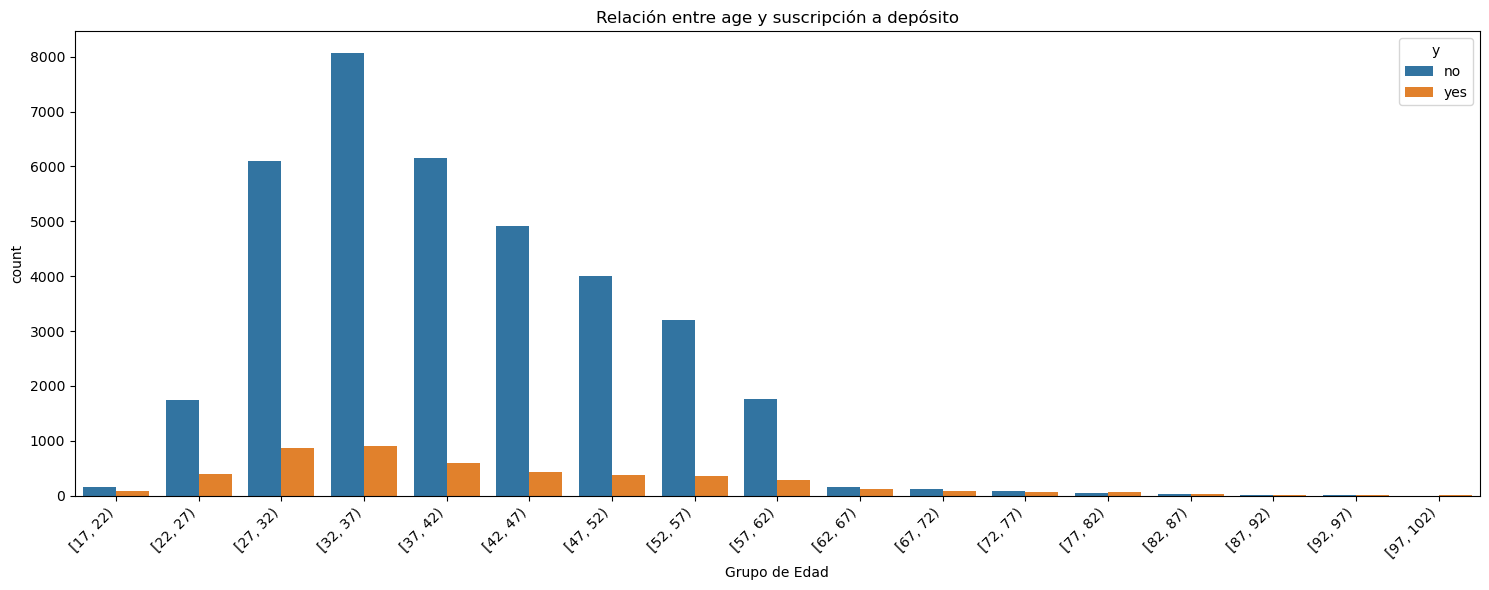

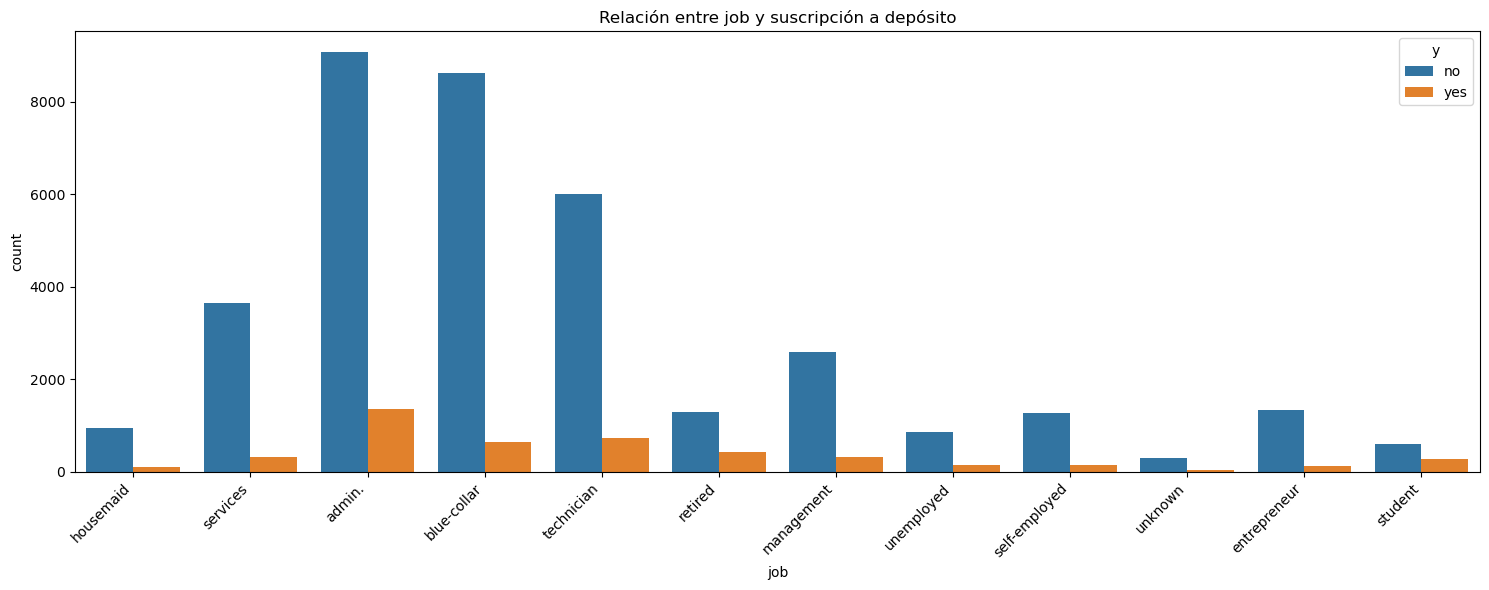

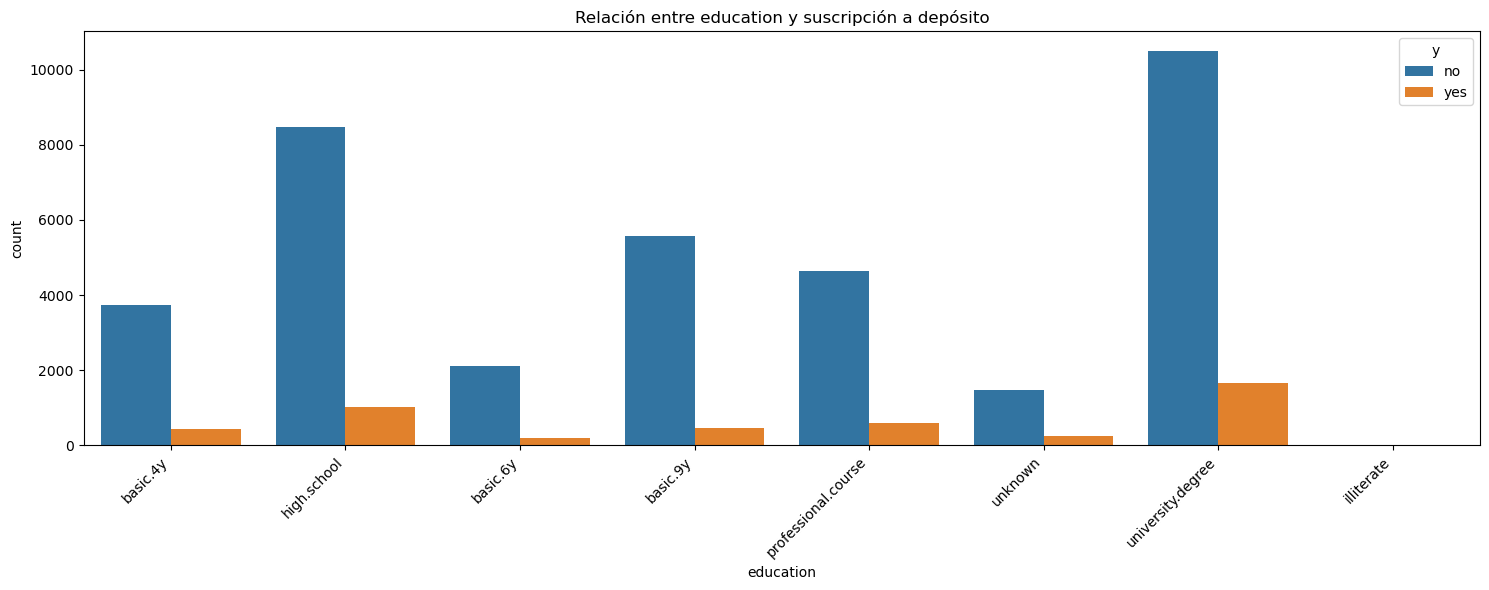

In [32]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# Supongamos que tu DataFrame se llama 'df' y ya está cargado

demographic_vars = ['age', 'job', 'education']

for var in demographic_vars:
    plt.figure(figsize=(15, 6))  # Aumentamos el ancho del gráfico para mejor visualización
    
    # Agrupamos las edades en intervalos para reducir la cantidad de barras
    if var == 'age':
        bins = list(range(min(df['age']), max(df['age']) + 5, 5))  # Intervalos de 5 años
        df['age_group'] = pd.cut(df['age'], bins=bins, right=False)
        sns.countplot(x='age_group', hue='y', data=df)
        plt.xticks(rotation=45, ha='right')  # Rotamos y alineamos las etiquetas para mayor legibilidad
        plt.xlabel('Grupo de Edad')  # Cambiamos la etiqueta del eje x
    else:
        sns.countplot(x=var, hue='y', data=df)
        plt.xticks(rotation=45, ha='right')  # Rotamos y alineamos las etiquetas para mayor legibilidad
        
    plt.title(f'Relación entre {var} y suscripción a depósito')
    plt.tight_layout()  # Ajustamos el diseño para evitar recortes
    plt.show()

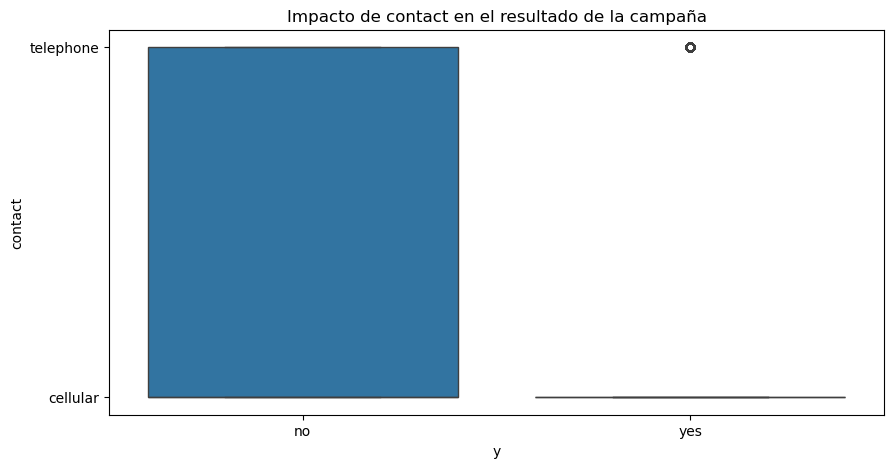

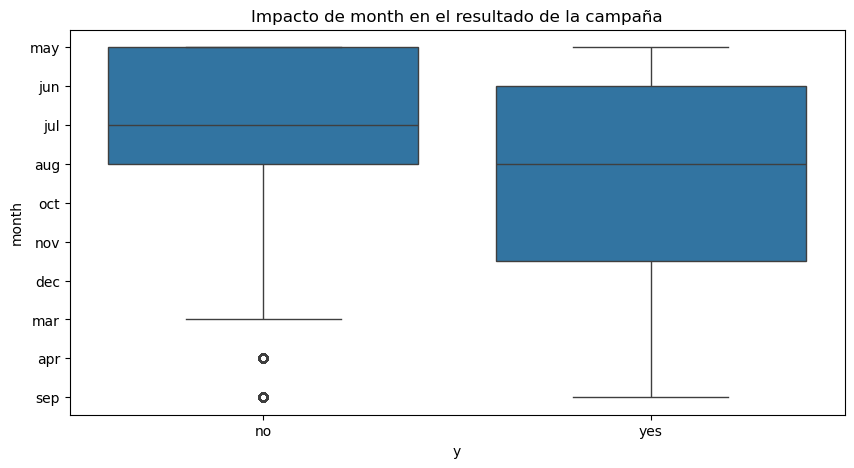

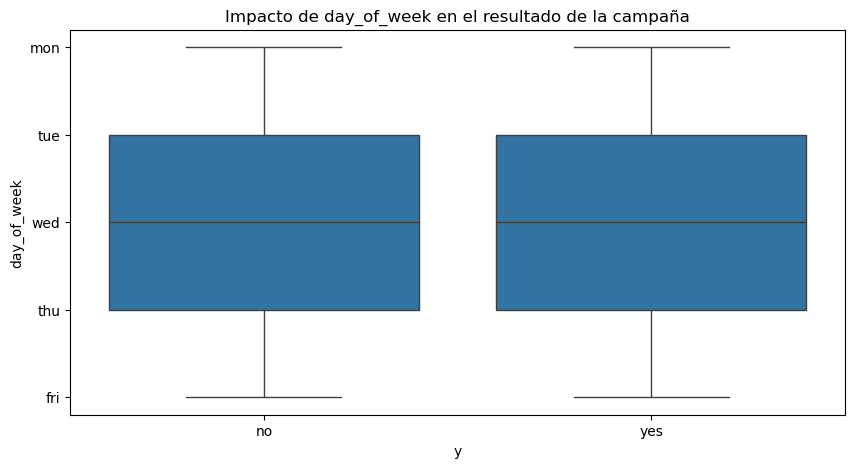

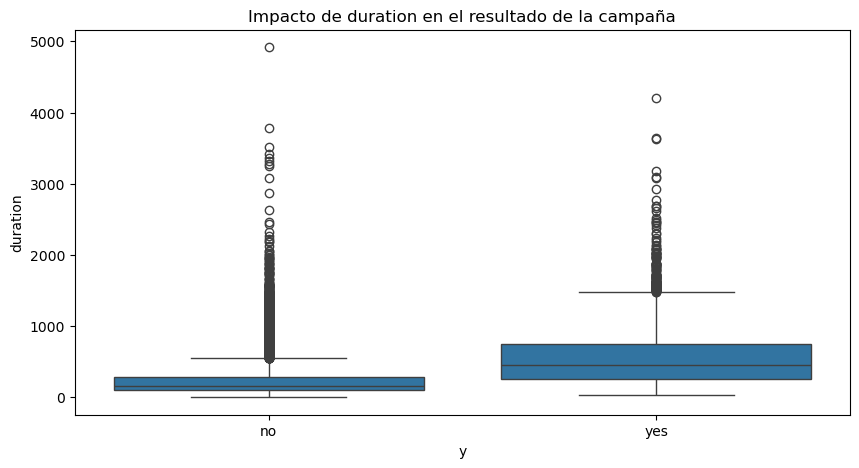

In [33]:
# Evaluación de impacto de detalles de campaña
campaign_vars = ['contact', 'month', 'day_of_week', 'duration']
for var in campaign_vars:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='y', y=var, data=df)
    plt.title(f'Impacto de {var} en el resultado de la campaña')
    plt.show()

In [34]:
# Modelo predictivo simple
X = df[['age', 'duration', 'campaign']]
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




In [35]:
# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))



Accuracy: 0.8872025254978144
Matriz de Confusión:
 [[7143  122]
 [ 807  164]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7265
           1       0.57      0.17      0.26       971

    accuracy                           0.89      8236
   macro avg       0.74      0.58      0.60      8236
weighted avg       0.86      0.89      0.86      8236



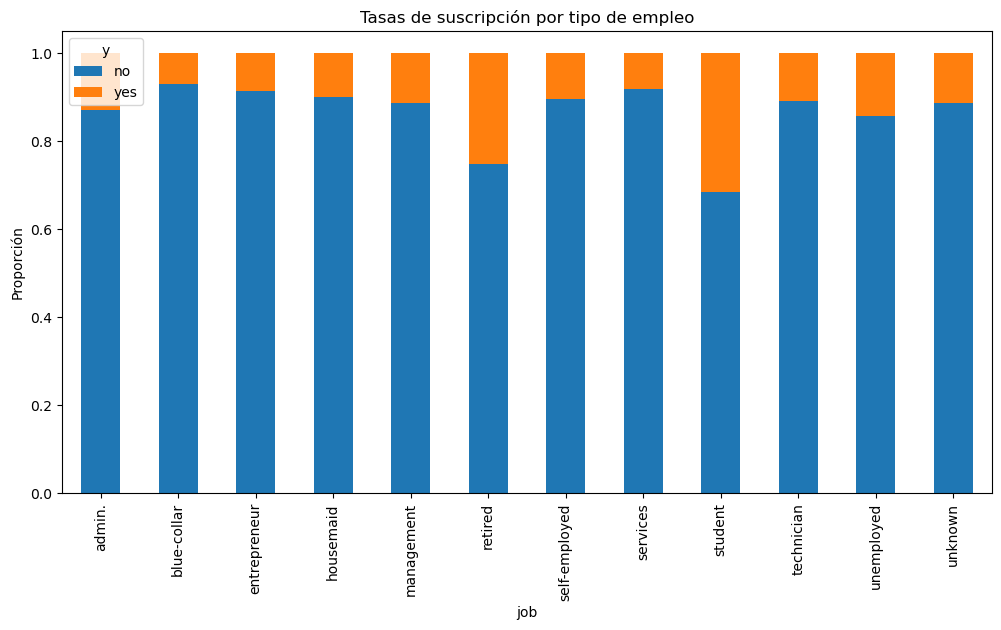

In [36]:
# Visualización de tasas de éxito
success_rates = df.groupby('job')['y'].value_counts(normalize=True).unstack()
success_rates.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Tasas de suscripción por tipo de empleo')
plt.ylabel('Proporción')
plt.show()

Tipos de datos en X antes del modelo:
bool       46
int64       6
float64     6
Name: count, dtype: int64
Valores no numéricos en X_train: Index([], dtype='object')

Regresión Logística:
Accuracy: 0.8961874696454589
AUC-ROC: 0.899709893873466
Matriz de Confusión:
 [[6883  382]
 [ 473  498]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      7265
           1       0.57      0.51      0.54       971

    accuracy                           0.90      8236
   macro avg       0.75      0.73      0.74      8236
weighted avg       0.89      0.90      0.89      8236


Random Forest:
Accuracy: 0.9069936862554638
AUC-ROC: 0.9409662029552125
Matriz de Confusión:
 [[6896  369]
 [ 397  574]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      7265
           1       0.61      0.59      0.60       971

    accuracy                           0.

/opt/anaconda3/envs/kernel_estadistica/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:57:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost:
Accuracy: 0.9082078678970374
AUC-ROC: 0.9412563799603505
Matriz de Confusión:
 [[6935  330]
 [ 426  545]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      7265
           1       0.62      0.56      0.59       971

    accuracy                           0.91      8236
   macro avg       0.78      0.76      0.77      8236
weighted avg       0.90      0.91      0.91      8236


Regresión Logística - Media de Accuracy: 0.9149877701322321

Random Forest - Media de Accuracy: 0.9435983909777951


/opt/anaconda3/envs/kernel_estadistica/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:58:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/kernel_estadistica/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:58:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/kernel_estadistica/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:58:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/kernel_estadistica/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:58:02] WARNING: /Users/runner/work/xgboost/xgboost/src/lear


XGBoost - Media de Accuracy: 0.9196510715683243


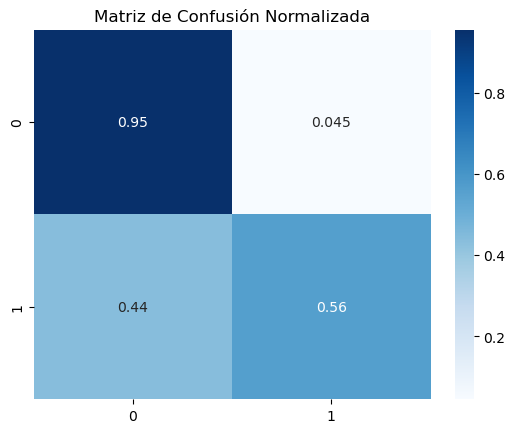

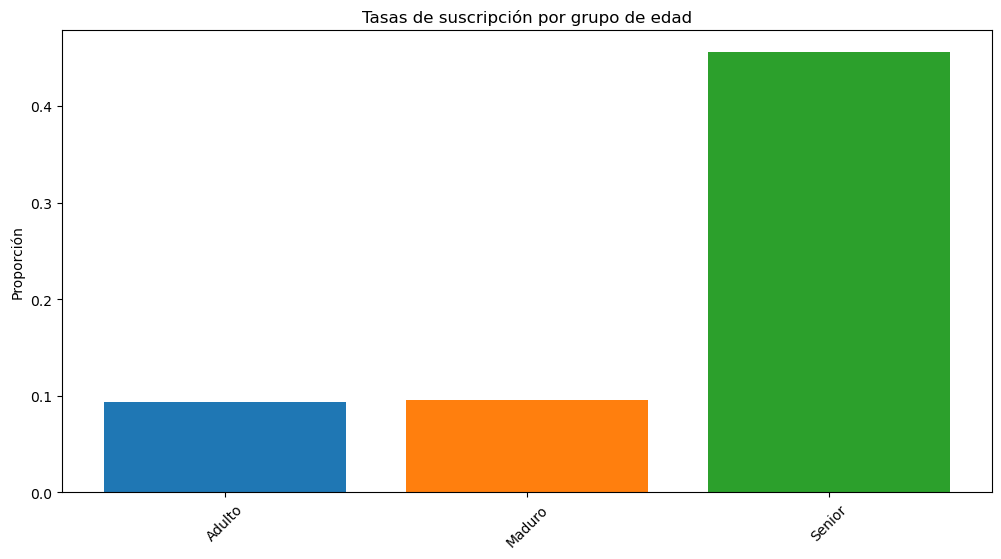

In [37]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
# from imblearn.over_sampling import SMOTE

# Cargar el dataset limpio
df = pd.read_csv('bank_cleaned.csv')

# Ingeniería de características
df['ratio_contactos_duración'] = df['duration'] / df['campaign']
df['edad_grupo'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 100], labels=['Joven', 'Adulto', 'Maduro', 'Senior'])

# Codificación de variables categóricas
columnas_categoricas = ['job', 'education', 'contact', 'month', 'day_of_week', 'marital', 'default', 'housing', 'loan', 'poutcome', 'edad_grupo']
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Asegurar que 'y' sea binaria
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Eliminar filas con valores NaN
df.dropna(inplace=True)

# Verificar si todas las variables son numéricas
print("Tipos de datos en X antes del modelo:")
print(df.dtypes.value_counts())

# División en variables predictoras y target
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar si quedan valores no numéricos antes de SMOTE
print("Valores no numéricos en X_train:", X_train.select_dtypes(include=['object']).columns)

# Manejo de desbalanceo con SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Prueba con modelos más robustos
models = {
    "Regresión Logística": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Validación cruzada
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"\n{name} - Media de Accuracy: {scores.mean()}")

# Matriz de Confusión Normalizada
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, cmap='Blues')
plt.title("Matriz de Confusión Normalizada")
plt.show()

# Visualización de tasas de éxito
plt.figure(figsize=(12,6))
edad_grupo_dummies = [col for col in df.columns if col.startswith('edad_grupo_')]
for grupo in edad_grupo_dummies:
    tasa_exito = df[df[grupo] == 1]['y'].mean()
    plt.bar(grupo.split('_')[-1], tasa_exito)
plt.title('Tasas de suscripción por grupo de edad')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

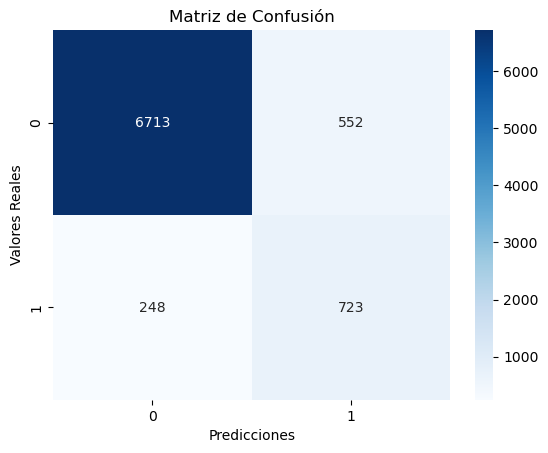

In [38]:
# Librerías necesarias
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler, QuantileTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer, precision_score
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB

# Cargar el dataset
# Carga el dataset desde el archivo CSV.
df = pd.read_csv('bank_cleaned.csv')

# Imprimir información del dataset (tipos de datos, no nulos, memoria)
df.info()

# Imprimir conteo de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con valores nulos
# Elimina todas las filas que contengan al menos un valor nulo.
df = df.dropna()

# Convertir 'age' a tipo entero
# Asegura que la columna 'age' contiene números enteros.
df['age'] = df['age'].astype(int)

# Convertir variables categóricas a numéricas usando Label Encoding
# Primero, identifica las columnas que son de tipo 'object' (string). Son nuestras categóricas.
categorical_cols = df.select_dtypes(include=['object']).columns

# Inicializa el LabelEncoder
le = LabelEncoder()

# Aplica Label Encoding a cada columna categórica
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])  # Transforma los strings a valores numéricos.

# Imprimir los tipos de datos después de la conversión para verificar
print("\nTipos de datos después de la conversión:")
print(df.dtypes)

# Preparar los datos para el modelo
# 'y' es la variable objetivo que queremos predecir. Las otras son las características.
X = df.drop(columns=['y'])  # Features (variables independientes)
y = df['y']  # Target (variable dependiente)

# Dividir los datos en conjuntos de entrenamiento y prueba
# Esto nos permite evaluar el modelo en datos que no ha visto antes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Ajuste 1: Transformación de Datos con QuantileTransformer**
#  Escala los datos para que tengan una distribución uniforme o gaussiana.  Puede ayudar a modelos sensibles a la distribución.
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)  # 'uniform' o 'normal'
X_train = quantile_transformer.fit_transform(X_train)
X_test = quantile_transformer.transform(X_test)

# **Ajuste 2: Manejo de desbalanceo de clases con SMOTE**
# SMOTE genera muestras sintéticas de la clase minoritaria para equilibrar los datos.
smote = SMOTE(random_state=42, sampling_strategy=0.7)  #Ajusta la estrategia de muestreo
X_train, y_train = smote.fit_resample(X_train, y_train)

# Escalar las características numéricas usando StandardScaler
# Esto es importante para algoritmos como la regresión logística que son sensibles a la escala.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Escala los datos de entrenamiento
X_test = scaler.transform(X_test)  # Escala los datos de prueba usando los mismos parámetros del entrenamiento

# **Ajuste 3: Modelos de Machine Learning - Random Forest con Grid Search**
# Define un modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Define el espacio de hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Definir un scorer personalizado para la precisión de la clase 1
precision_clase_1 = make_scorer(precision_score, pos_label=1)

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring=precision_clase_1,  # Utiliza el scorer personalizado
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Ajustar la búsqueda en cuadrícula a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el mejor modelo de la búsqueda en cuadrícula
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el modelo
# Calcula varias métricas para evaluar el rendimiento del modelo.
print("\nResultados de la evaluación:")
print("Accuracy:", accuracy_score(y_test, y_pred))  # Exactitud general del modelo
print("AUC-ROC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))  # Área bajo la curva ROC. Mide la capacidad del modelo para distinguir entre clases.
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))  # Muestra los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))  # Proporciona precisión, recall, F1-score para cada clase

# Visualizar la matriz de confusión
# Un heatmap facilita la interpretación de la matriz de confusión.
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


###Gráfico 1: Segmentación de Clientes

/var/folders/z8/tmchvtmj2mlgnt1zqcmk0f6h0000gn/T/ipykernel_61538/1357990428.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segmento', y='Tasa de Conversión', data=df_segmentos, palette='Blues_d')


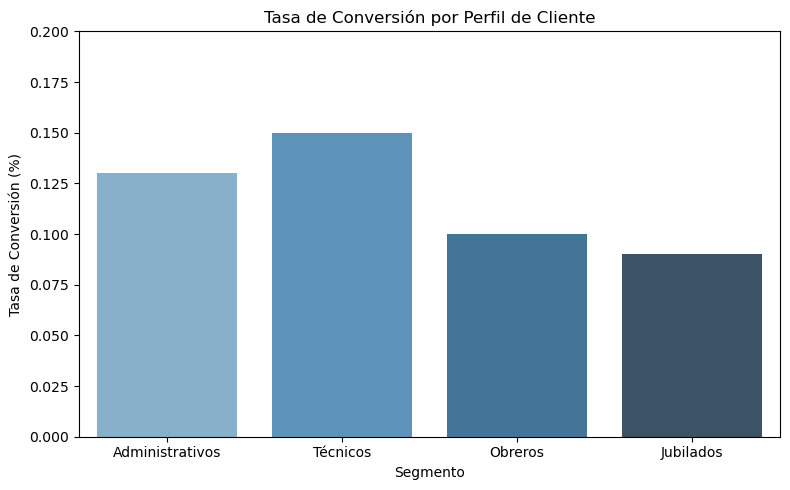

In [39]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# Segmentación de clientes: ejemplo basado en tu análisis
df_segmentos = pd.DataFrame({
    'Segmento': ['Administrativos', 'Técnicos', 'Obreros', 'Jubilados'],
    'Tasa de Conversión': [0.13, 0.15, 0.10, 0.09]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Segmento', y='Tasa de Conversión', data=df_segmentos, palette='Blues_d')
plt.title('Tasa de Conversión por Perfil de Cliente')
plt.ylabel('Tasa de Conversión (%)')
plt.ylim(0, 0.2)
plt.tight_layout()
plt.show()

. Segmentación de Clientes – Quién convierte más
Conclusión:
Clientes técnicos yy administrativos , de entre 30 y 50 años, con nivel educativo medio o alto , son los más propensos a aceptar depósitos a plazo.

Decisión estratégica:
Enfocar campañas enen estos perfiles aumentará significativamente la efectividad comercial.

###Gráfico 2: Canal de Contacto

/var/folders/z8/tmchvtmj2mlgnt1zqcmk0f6h0000gn/T/ipykernel_61538/688027830.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tasa de Conversión', y='Canal', data=df_canales, palette='Greens')


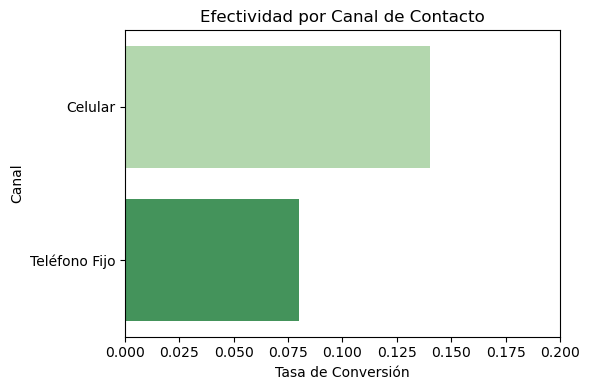

In [40]:
# Efectividad por canal
df_canales = pd.DataFrame({
    'Canal': ['Celular', 'Teléfono Fijo'],
    'Tasa de Conversión': [0.14, 0.08]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Tasa de Conversión', y='Canal', data=df_canales, palette='Greens')
plt.title('Efectividad por Canal de Contacto')
plt.xlim(0, 0.2)
plt.tight_layout()
plt.show()


Conclusión:
El canal celular es 1.7 veces más efectivo que el teléfono fijo para lograr conversiones.

Decisión estratégica:
Redirigir recursos y automatización hacia el contacto vía celular, SMS y notificaciones push.

###Gráfico 3: Estacionalidad por Mes

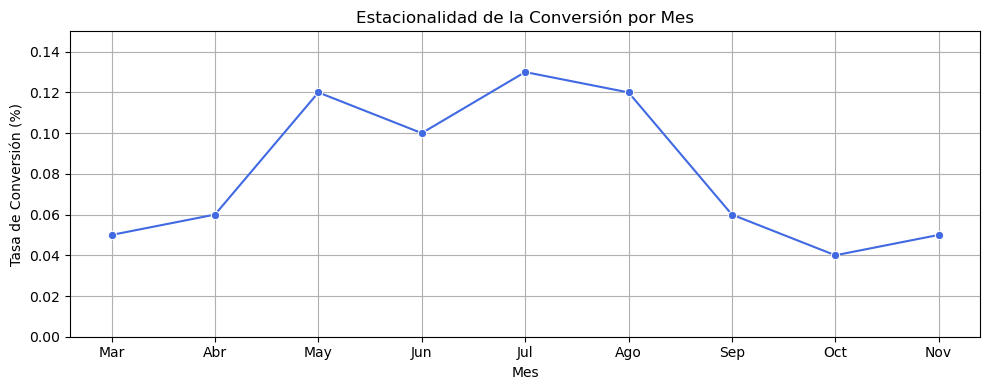

In [41]:
# Estacionalidad: tasa de conversión mensual
df_meses = pd.DataFrame({
    'Mes': ['Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov'],
    'Tasa de Conversión': [0.05, 0.06, 0.12, 0.10, 0.13, 0.12, 0.06, 0.04, 0.05]
})

plt.figure(figsize=(10, 4))
sns.lineplot(x='Mes', y='Tasa de Conversión', data=df_meses, marker='o', color='royalblue')
plt.title('Estacionalidad de la Conversión por Mes')
plt.ylabel('Tasa de Conversión (%)')
plt.ylim(0, 0.15)
plt.grid(True)
plt.tight_layout()
plt.show()


 Estacionalidad – Cuándo actuar
Conclusión:
Los meses de mayo, julio y agosto concentran más del 60% de las conversiones. Hay una clara estacionalidad.

Decisión estratégica:
Planificar campañas clave en estos meses con mayores incentivos o visibilidad.